In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import dataToVar as dat

In [6]:
def percFit(list):
    err = []
    ratioBot = list/np.average(list[-100:])
    for i in ratioBot:
        if i>1.04:
            err.append(i)
  
    
    return list[:len(err)]

In [7]:
thir = dat.cthir
fif = dat.cfif
sev = dat.csev
def makeCsv():
    thirFit = 81-1*np.array(percFit(thir[thir.tolist().index(np.max(thir)):],50).tolist())
    sevFit = 81-1*sev[sev.tolist().index(np.max(sev)):len(thirFit)+sev.tolist().index(np.max(sev))]
    fifFit = 81-1*fif[fif.tolist().index(np.max(fif)):len(thirFit)+fif.tolist().index(np.max(fif))]

    
    # print(len(thirFit),len(sevFit),len(fifFit))
    import pandas as pd
    dF = pd.DataFrame({'time':np.arange(0,len(thirFit)),10:sevFit,30:fifFit,50:thirFit})
    dF.to_csv('negCoolData.csv')
# makeCsv()

AttributeError: module 'dataToVar' has no attribute 'cthir'

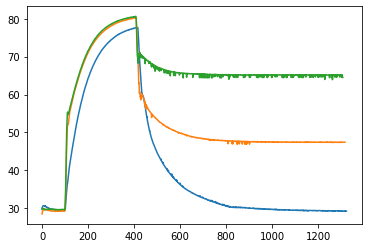

In [ ]:
plt.plot(thir)
plt.plot(fif)
plt.plot(sev)

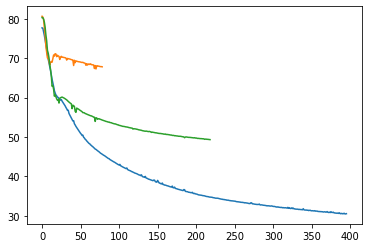

In [ ]:
plt.plot(percFit(thir[thir.tolist().index(np.max(thir)):]))
plt.plot(percFit(sev[sev.tolist().index(np.max(sev)):]))
plt.plot(percFit(fif[fif.tolist().index(np.max(fif)):]))

In [8]:
data = 'negCoolData.csv'

time = pd.read_csv(data)['time']
Tset = [10,30,50]
T = time.tolist()
TIME,TSET = np.meshgrid(T,Tset)
xdata = [T,Tset]
x = []
y = []
z = []
for i in Tset:
    for u in T:
        y.append(i)
for i in Tset:
    for u in T:
        x.append(u)



def fitFun(xy,a,b,c,d,e,f,g,h):
    x=xy[0]
    y=xy[1]
    return (a*np.log(x**b+c)+d)*(e*y**f+g)+h                                                                                        ####### eq model #################

def fun(a):
    c = []
    for i in a:
        c.append(np.array(pd.read_csv(data)[str(i)].tolist()))
    return np.array(c)
hal = fun(Tset)
for i in hal:
    for u in i:
        z.append(u)


param2d,xxx = opt.curve_fit(fitFun,[x,y],z)
print(param2d)
def r2(temp):

    st = sum((hal[temp]-np.average(hal[temp]))**2)
    sr = sum((hal[temp]-fitFun([TIME,TSET],*param2d)[temp])**2)
    r2 = 1-sr/st
    return round(r2,3)


def makeCsv():
    dF = pd.DataFrame({20:fitFun([TIME,TSET],*param2d)[0],
    40:fitFun([TIME,TSET],*param2d)[1],
    60:fitFun([TIME,TSET],*param2d)[2]})
    dF.to_csv('fitData3d.csv')
# makeCsv()




def r2surf():
    zlist = []
    for i in hal:
        for u in i:
            zlist.append(u)


    zlistfit = []
    for i in fitFun([TIME,TSET],*param2d):
        for u in i:
            zlistfit.append(u)
    zlist = np.array(zlist)
    zlistfit = np.array(zlistfit)

    st = sum((zlist-np.average(zlist))**2)
    sr = sum((zlist-zlistfit)**2)
    r2 = 1-sr/st
    return round(r2,3)




def r2(temp):

    st = sum((hal[temp]-np.average(hal[temp]))**2)
    sr = sum((hal[temp]-fitFun([TIME,TSET],*param2d)[temp])**2)
    r2 = 1-sr/st
    return round(r2,3)

print('50: ',r2(0))
print('70: ',r2(1))
print('90: ',r2(2))
 
print('surf: ',r2surf())

[ 2.43102979e-01  9.39183633e+00  1.15691901e+03 -3.65334831e+00
  2.11303472e-01  8.00092904e-01 -5.72547526e-01  8.72193633e+00]
50:  0.855
70:  0.937
90:  0.991
surf:  0.993


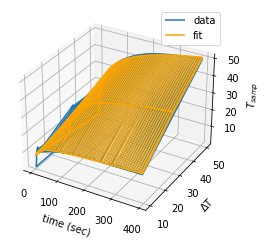

In [9]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(TIME,TSET,hal,label='data')
ax.plot_wireframe(TIME,TSET,fitFun([TIME,TSET],*param2d),color='orange',label='fit')
ax.set_xlabel('time (sec)')
ax.set_ylabel('$\Delta$T')
ax.set_zlabel('$T_{samp}$')
ax.legend()
plt.show()



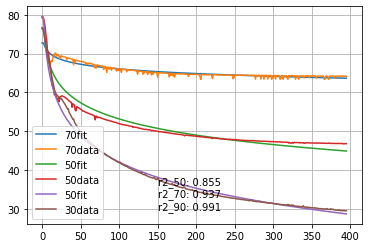

In [10]:
plt.plot(80+-1*fitFun([TIME,TSET],*param2d)[0],label='70fit')
plt.plot(80+-1*hal[0],label='70data')
plt.plot(80+-1*fitFun([TIME,TSET],*param2d)[1],label='50fit')
plt.plot(80+-1*hal[1],label='50data')
plt.plot(80+-1*fitFun([TIME,TSET],*param2d)[2],label='50fit')
plt.plot(80+-1*hal[2],label='30data')
# plt.xlim(0,300)


plt.text(150,30,''.join(['r2_50: ',str(r2(0)),'\n','r2_70: ',str(r2(1)),'\n','r2_90: ',str(r2(2))]))
plt.grid()
plt.legend()

plt.savefig('cool3dFit.png')

51.27124231789731


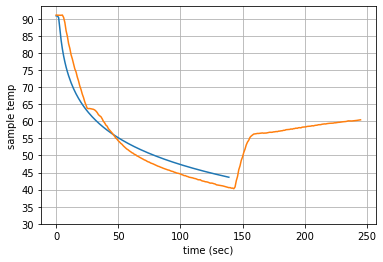

43.63132719822374


In [12]:
def Tsamp(time,T0,Tset,a,b,c,d,e,f,g,h):
    return ((a*np.log(time**b+c)+d)*(e*(T0-Tset)**f+g)+h)*-1+81+(T0-80)
print(Tsamp(120,90,40,*param2d))

time = np.arange(0,140)
plt.figure()
plt.plot(Tsamp(time,89,30,*param2d))
# plt.plot(Tsamp(time,70,50,*param2d))
plt.plot(dat.fr1[0][670:])
plt.yticks(np.arange(30,95,5))
plt.xlabel('time (sec)')
plt.ylabel('sample temp')
plt.grid()
plt.show()

print(Tsamp(time,89,30,*param2d)[-1])